In [1]:
from autogluon.tabular import TabularPredictor
import shap

ModuleNotFoundError: No module named 'autogluon'

In [2]:
predictor = TabularPredictor.load("autogluon_models")

In [3]:
import pandas as pd
df = pd.read_csv("../data/clean_data.csv")
predictor.feature_importance(df)


,importance,stddev,p_value,n,p99_high,p99_low
Have you ever had suicidal thoughts ?,0.10900,0.004727,4.232077e-07,5,0.118732,0.099268
Academic Pressure,0.08520,0.003280,2.631416e-07,5,0.091954,0.078446
Financial Stress,0.03988,0.002972,3.673414e-06,5,0.045999,0.033761
Age,0.01840,0.002588,4.578110e-05,5,0.023730,0.013070
Dietary Habits,0.01288,0.004004,9.897076e-04,5,0.021124,0.004636
Study Hours,0.01200,0.001530,3.101247e-05,5,0.015150,0.008850
Study Satisfaction,0.00868,0.003673,3.076624e-03,5,0.016243,0.001117
Sleep Duration,0.00444,0.001785,2.560941e-03,5,0.008116,0.000764
Family History of Mental Illness,0.00276,0.001062,2.182416e-03,5,0.004947,0.000573
City,0.00212,0.001460,1.573855e-02,5,0.005126,-0.000886


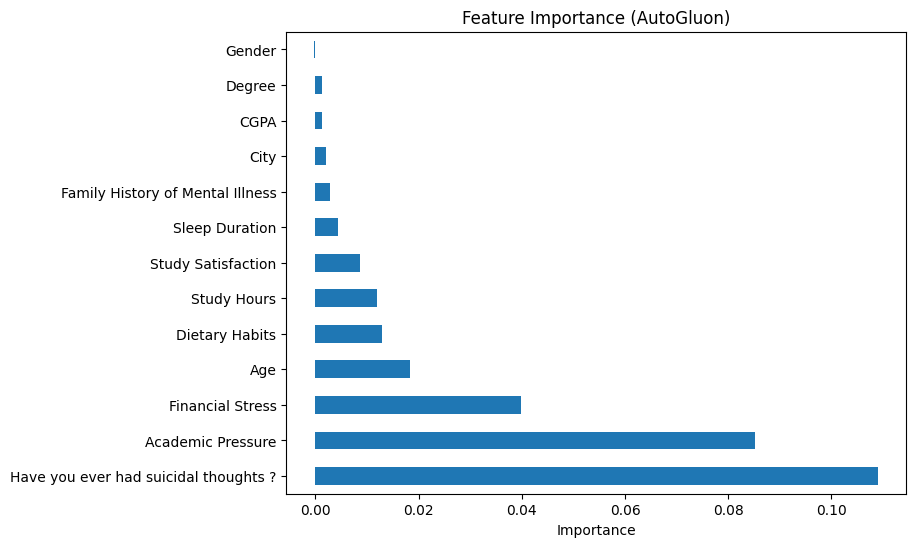

In [4]:
import matplotlib.pyplot as plt

fi = predictor.feature_importance(df)
fi['importance'].plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (AutoGluon)")
plt.xlabel("Importance")
plt.show()


In [5]:
predictor.leaderboard(silent=False)

                        model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2   0.852096    accuracy       0.085553  64.713833                0.000000           0.653001            2       True         14
1             CatBoost_BAG_L1   0.852096    accuracy       0.085553  64.060832                0.085553          64.060832            1       True          5
2        CatBoost_r177_BAG_L1   0.851289    accuracy       0.061713  43.542790                0.061713          43.542790            1       True         12
3   NeuralNetTorch_r79_BAG_L1   0.849899    accuracy       0.364795  70.758113                0.364795          70.758113            1       True         13
4             LightGBM_BAG_L1   0.849182    accuracy       0.482362   3.991174                0.482362           3.991174            1       True          2
5      NeuralNetFastAI_BAG_L1   0.848913    accuracy      

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.852096,accuracy,0.085553,64.713833,0.000000,0.653001,2,True,14
1,CatBoost_BAG_L1,0.852096,accuracy,0.085553,64.060832,0.085553,64.060832,1,True,5
2,CatBoost_r177_BAG_L1,0.851289,accuracy,0.061713,43.542790,0.061713,43.542790,1,True,12
3,NeuralNetTorch_r79_BAG_L1,0.849899,accuracy,0.364795,70.758113,0.364795,70.758113,1,True,13
4,LightGBM_BAG_L1,0.849182,accuracy,0.482362,3.991174,0.482362,3.991174,1,True,2
5,NeuralNetFastAI_BAG_L1,0.848913,accuracy,0.632744,62.873381,0.632744,62.873381,1,True,8
6,NeuralNetTorch_BAG_L1,0.848778,accuracy,0.276289,84.462174,0.276289,84.462174,1,True,10
7,XGBoost_BAG_L1,0.848330,accuracy,0.341102,6.545444,0.341102,6.545444,1,True,9
8,LightGBMXT_BAG_L1,0.847254,accuracy,0.776659,3.084885,0.776659,3.084885,1,True,1
9,LightGBMLarge_BAG_L1,0.846043,accuracy,0.588434,6.493497,0.588434,6.493497,1,True,11


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
categorical_cols = ['Gender', 'City', 'Degree', 'Dietary Habits', 'Sleep Duration']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

df_encoded = preprocessor.fit_transform(df)

In [12]:
X_train_internal, y_train_internal= predictor.load_data_internal()

sample_df = X_train_internal.sample(100, random_state=42)

PermutationExplainer explainer: 101it [04:11,  2.51s/it]                                                                                                       
C:\Users\nakul\AppData\Local\Temp\ipykernel_27220\1583988934.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sample_df)


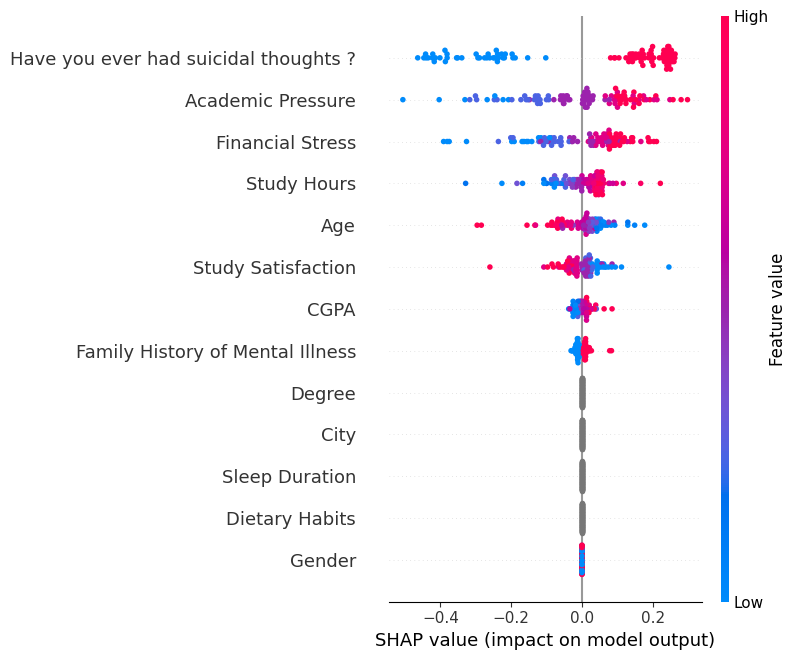

In [15]:
explainer = shap.Explainer(predictor.predict, sample_df)
shap_values = explainer(sample_df)
shap.summary_plot(shap_values, sample_df)


C:\Users\nakul\AppData\Local\Temp\ipykernel_27220\2387449236.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sample_df, plot_type="bar")


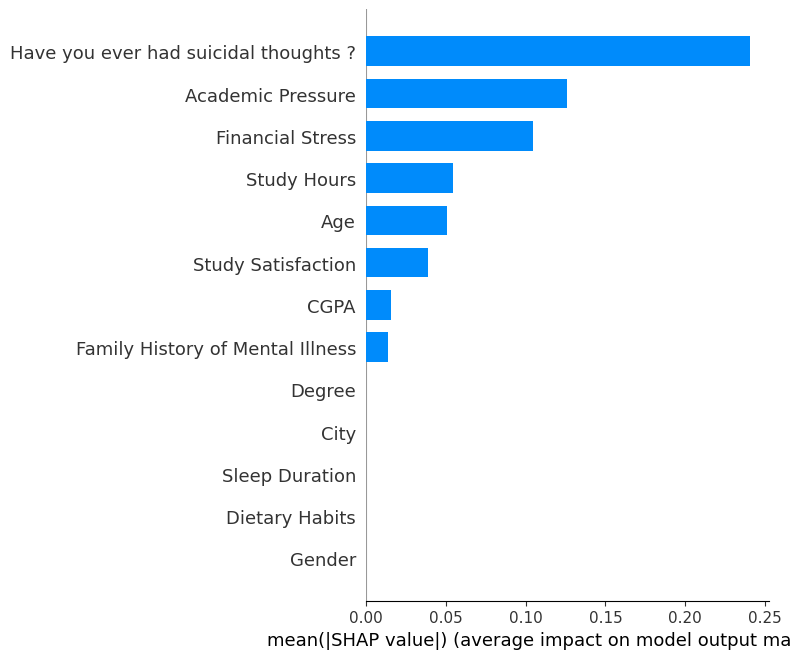

In [16]:
shap.summary_plot(shap_values, sample_df, plot_type="bar")